In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from datetime import date, timedelta
from bs4 import BeautifulSoup
from urllib.parse import urljoin

API 

In [2]:
API_URL = "https://api.football-data.org/v4/competitions/PL/teams"
API_KEY = "983c15f66740402b8a7794f63ebdac49"

In [3]:
#football data api use x-auth-token header to authenticate requests
headers = {"X-Auth-Token": API_KEY}

In [ ]:
response= requests.get(API_URL, headers=headers)

In [ ]:
if response.status_code == 200:
    data = response.json()
else:
    print("Ошибка при запросе API:", response.status_code)
    data = {}
print("Status code:", response.status_code)

Status code: 200


In [8]:
print(type(data))
len(data)

<class 'dict'>


5

In [9]:
data

{'count': 20,
 'filters': {'season': '2025'},
 'competition': {'id': 2021,
  'name': 'Premier League',
  'code': 'PL',
  'type': 'LEAGUE',
  'emblem': 'https://crests.football-data.org/PL.png'},
 'season': {'id': 2403,
  'startDate': '2025-08-15',
  'endDate': '2026-05-24',
  'currentMatchday': 8,
  'winner': None},
 'teams': [{'area': {'id': 2072,
    'name': 'England',
    'code': 'ENG',
    'flag': 'https://crests.football-data.org/770.svg'},
   'id': 57,
   'name': 'Arsenal FC',
   'shortName': 'Arsenal',
   'tla': 'ARS',
   'crest': 'https://crests.football-data.org/57.png',
   'address': '75 Drayton Park London N5 1BU',
   'website': 'http://www.arsenal.com',
   'founded': 1886,
   'clubColors': 'Red / White',
   'venue': 'Emirates Stadium',
   'runningCompetitions': [{'id': 2021,
     'name': 'Premier League',
     'code': 'PL',
     'type': 'LEAGUE',
     'emblem': 'https://crests.football-data.org/PL.png'},
    {'id': 2001,
     'name': 'UEFA Champions League',
     'code': 'C

In [12]:
print(data.keys())


dict_keys(['count', 'filters', 'competition', 'season', 'teams'])


In [17]:
teams=[]
for team in data.get("teams", []):
        teams.append({
            "Name": team.get("shortName"),
            "ShortName": team.get("tla"),
            "Founded": team.get("founded"),
            "Stadium": team.get("venue"),
            "Country": team.get("area", {}).get("name")
        })

In [19]:
df=pd.DataFrame(teams)
df.columns


Index(['Name', 'ShortName', 'Founded', 'Stadium', 'Country'], dtype='object')

In [20]:
df

,Name,ShortName,Founded,Stadium,Country
0,Arsenal,ARS,1886,Emirates Stadium,England
1,Aston Villa,AVL,1872,Villa Park,England
2,Chelsea,CHE,1905,Stamford Bridge,England
3,Everton,EVE,1878,Goodison Park,England
4,Fulham,FUL,1879,Craven Cottage,England
5,Liverpool,LIV,1892,Anfield,England
6,Man City,MCI,1880,Etihad Stadium,England
7,Man United,MUN,1878,Old Trafford,England
8,Newcastle,NEW,1881,St. James' Park,England
9,Sunderland,SUN,1879,Stadium of Light,England


So easy table where everything is already simple, because of this we don't need explode(), json_normalize() like in complex data((lists/dictionaries inside cells).)

In [21]:
df.to_csv("Premier_League_Teams.csv", index=False, encoding='utf-8')

Web Scraping


In [37]:
URL="https://www.bbc.com/sport/football/premier-league/table"
headers = {"User-Agent": "Mozilla/5.0"}

In [38]:
print(type(headers))

<class 'dict'>


In [39]:
resp = requests.get(URL, headers=headers, timeout=10)
print("Status:", resp.status_code)
print("First 500 chars:\n", resp.text[:500])

Status: 200
First 500 chars:
 <!DOCTYPE html><html lang="en-GB" class="no-js"><head><meta charSet="utf-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /><title data-rh="true">Premier League Table and Standings - Football - BBC Sport</title><meta data-rh="true" name="description" content="Find out which football teams are leading the pack or at the foot of the table in the Premier League on BBC Sport"/><meta data-rh="true" name="theme-color" content="#FFFFFF"/><meta data-rh="true" property="og:descrip


In [25]:
soup = BeautifulSoup(response.text, "html.parser")

In [32]:
table = soup.find("table")
rows = table.find_all("tr")
headers = [th.text.strip() for th in rows[0].find_all("th")]
data = []
for row in rows[1:]:
    cols = [td.text.strip() for td in row.find_all("td")]
    if cols:
        data.append(cols)
data

[['1Arsenal',
  '8',
  '6',
  '1',
  '1',
  '15',
  '3',
  '12',
  '19',
  'LResult LossWResult WinDResult DrawWResult WinWResult WinWResult Win'],
 ['2Manchester City',
  '8',
  '5',
  '1',
  '2',
  '17',
  '6',
  '11',
  '16',
  'LResult LossWResult WinDResult DrawWResult WinWResult WinWResult Win'],
 ['3AFC Bournemouth',
  '8',
  '4',
  '3',
  '1',
  '14',
  '11',
  '3',
  '15',
  'WResult WinWResult WinDResult DrawDResult DrawWResult WinDResult Draw'],
 ['4Liverpool',
  '8',
  '5',
  '0',
  '3',
  '14',
  '11',
  '3',
  '15',
  'WResult WinWResult WinWResult WinLResult LossLResult LossLResult Loss'],
 ['5Chelsea',
  '8',
  '4',
  '2',
  '2',
  '16',
  '9',
  '7',
  '14',
  'WResult WinDResult DrawLResult LossLResult LossWResult WinWResult Win'],
 ['6Tottenham Hotspur',
  '8',
  '4',
  '2',
  '2',
  '14',
  '7',
  '7',
  '14',
  'LResult LossWResult WinDResult DrawDResult DrawWResult WinLResult Loss'],
 ['7Sunderland',
  '8',
  '4',
  '2',
  '2',
  '9',
  '6',
  '3',
  '14',
  'WRes

In [30]:
df2 = pd.DataFrame(data, columns=headers)
df2

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,"Form, Last 6 games, Oldest first"
0,1Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...
1,2Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...
2,3AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...
3,4Liverpool,8,5,0,3,14,11,3,15,WResult WinWResult WinWResult WinLResult LossL...
4,5Chelsea,8,4,2,2,16,9,7,14,WResult WinDResult DrawLResult LossLResult Los...
5,6Tottenham Hotspur,8,4,2,2,14,7,7,14,LResult LossWResult WinDResult DrawDResult Dra...
6,7Sunderland,8,4,2,2,9,6,3,14,WResult WinDResult DrawDResult DrawWResult Win...
7,8Crystal Palace,8,3,4,1,12,8,4,13,WResult WinDResult DrawWResult WinWResult WinL...
8,9Manchester United,8,4,1,3,11,12,-1,13,WResult WinLResult LossWResult WinLResult Loss...
9,10Brighton & Hove Albion,8,3,3,2,12,11,1,12,WResult WinLResult LossDResult DrawWResult Win...


In [31]:
df2.to_csv("premier_league_table.csv", index=False, encoding="utf-8")

Data Cleaning & Preperation


In [43]:
df.head(5)

,Name,ShortName,Founded,Stadium,Country
0,Arsenal,ARS,1886,Emirates Stadium,England
1,Aston Villa,AVL,1872,Villa Park,England
2,Chelsea,CHE,1905,Stamford Bridge,England
3,Everton,EVE,1878,Goodison Park,England
4,Fulham,FUL,1879,Craven Cottage,England


In [44]:
df.tail(5)

,Name,ShortName,Founded,Stadium,Country
15,Crystal Palace,CRY,1905,Selhurst Park,England
16,Brighton Hove,BHA,1898,The American Express Community Stadium,England
17,Brentford,BRE,1889,Griffin Park,England
18,West Ham,WHU,1895,London Stadium,England
19,Bournemouth,BOU,1890,Vitality Stadium,England


In [46]:
df.dtypes

Name         object
ShortName    object
Founded       int64
Stadium      object
Country      object
dtype: object

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.fillna("Unknown", inplace=True)

In [ ]:
df.rename(columns={"ShortName":"Team"}, inplace=True)
df.head(3)

,Name,Team,Founded,Stadium,Country
0,Arsenal,ARS,1886,Emirates Stadium,England
1,Aston Villa,AVL,1872,Villa Park,England
2,Chelsea,CHE,1905,Stamford Bridge,England


In [79]:
print(df.isnull().sum())

Name       0
Team       0
Founded    0
Stadium    0
Country    0
dtype: int64


For data from Web scraping df2

In [60]:
df2.head(5)

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,"Form, Last 6 games, Oldest first"
0,Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...
1,Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...
2,AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...
3,Liverpool,8,5,0,3,14,11,3,15,WResult WinWResult WinWResult WinLResult LossL...
4,Chelsea,8,4,2,2,16,9,7,14,WResult WinDResult DrawLResult LossLResult Los...


In [61]:
df2.tail(5)

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,"Form, Last 6 games, Oldest first"
15,Leeds United,8,2,2,4,7,13,-6,8,DResult DrawLResult LossWResult WinDResult Dra...
16,Burnley,8,2,1,5,9,15,-6,7,LResult LossLResult LossDResult DrawLResult Lo...
17,Nottingham Forest,8,1,2,5,5,15,-10,5,LResult LossLResult LossDResult DrawLResult Lo...
18,West Ham United,8,1,1,6,6,18,-12,4,WResult WinLResult LossLResult LossDResult Dra...
19,Wolverhampton Wanderers,8,0,2,6,5,16,-11,2,LResult LossLResult LossLResult LossDResult Dr...


In [62]:
df2.dtypes

Team                                object
Played                              object
Won                                 object
Drawn                               object
Lost                                object
Goals For                           object
Goals Against                       object
Goal Difference                     object
Points                              object
Form, Last 6 games, Oldest first    object
dtype: object

In [63]:
df2.drop_duplicates(inplace=True)

In [64]:
df2.fillna(0, inplace=True)

In [65]:
df2['Team'] = df2['Team'].str.replace(r'^\d+', '', regex=True).str.strip()
df2.head(5)


,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,"Form, Last 6 games, Oldest first"
0,Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...
1,Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...
2,AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...
3,Liverpool,8,5,0,3,14,11,3,15,WResult WinWResult WinWResult WinLResult LossL...
4,Chelsea,8,4,2,2,16,9,7,14,WResult WinDResult DrawLResult LossLResult Los...


In [67]:
df2.rename(columns={
    'Goals For': 'GF',
    'Goals Against': 'GA'
}, inplace=True)
df2.head(3)

,Team,Played,Won,Drawn,Lost,GF,GA,Goal Difference,Points,"Form, Last 6 games, Oldest first"
0,Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...
1,Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...
2,AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...


In [80]:
print(df2.isnull().sum())

Team                                0
Played                              0
Won                                 0
Drawn                               0
Lost                                0
GF                                  0
GA                                  0
Goal Difference                     0
Points                              0
Form, Last 6 games, Oldest first    0
dtype: int64


In [75]:
df_both = pd.merge(df2, df, left_on='Team', right_on='Name', how='left')
print(df_both.head(5))

            Team_x Played Won Drawn Lost  GF  GA Goal Difference Points  \
0          Arsenal      8   6     1    1  15   3              12     19   
1  Manchester City      8   5     1    2  17   6              11     16   
2  AFC Bournemouth      8   4     3    1  14  11               3     15   
3        Liverpool      8   5     0    3  14  11               3     15   
4          Chelsea      8   4     2    2  16   9               7     14   

                    Form, Last 6 games, Oldest first       Name Team_y  \
0  LResult LossWResult WinDResult DrawWResult Win...    Arsenal    ARS   
1  LResult LossWResult WinDResult DrawWResult Win...        NaN    NaN   
2  WResult WinWResult WinDResult DrawDResult Draw...        NaN    NaN   
3  WResult WinWResult WinWResult WinLResult LossL...  Liverpool    LIV   
4  WResult WinDResult DrawLResult LossLResult Los...    Chelsea    CHE   

   Founded           Stadium  Country  
0   1886.0  Emirates Stadium  England  
1      NaN              

In [76]:
print(df_both.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Team_x                            20 non-null     object 
 1   Played                            20 non-null     object 
 2   Won                               20 non-null     object 
 3   Drawn                             20 non-null     object 
 4   Lost                              20 non-null     object 
 5   GF                                20 non-null     object 
 6   GA                                20 non-null     object 
 7   Goal Difference                   20 non-null     object 
 8   Points                            20 non-null     object 
 9   Form, Last 6 games, Oldest first  20 non-null     object 
 10  Name                              11 non-null     object 
 11  Team_y                            11 non-null     object 
 12  Founded   

In [150]:
df_both.dropna(inplace=True)
clean=df_both
print(clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Team_x                            20 non-null     object 
 1   Played                            20 non-null     int64  
 2   Won                               20 non-null     int64  
 3   Drawn                             20 non-null     int64  
 4   Lost                              20 non-null     int64  
 5   GF                                20 non-null     int64  
 6   GA                                20 non-null     int64  
 7   Goal Difference                   20 non-null     int64  
 8   Points                            20 non-null     int64  
 9   Form, Last 6 games, Oldest first  20 non-null     object 
 10  Name                              20 non-null     object 
 11  Team_y                            20 non-null     object 
 12  Founded   

In [153]:
clean.head()

,Team_x,Played,Won,Drawn,Lost,GF,GA,Goal Difference,Points,"Form, Last 6 games, Oldest first",Name,Team_y,Founded,Stadium,Country,GoalDifference
0,Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...,Arsenal,ARS,1886.0,Emirates Stadium,England,12
1,Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...,Unknown,Unknown,1886.0,Unknown,Unknown,11
2,AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...,Unknown,Unknown,1886.0,Unknown,Unknown,3
3,Liverpool,8,5,0,3,14,11,3,15,WResult WinWResult WinWResult WinLResult LossL...,Liverpool,LIV,1892.0,Anfield,England,3
4,Chelsea,8,4,2,2,16,9,7,14,WResult WinDResult DrawLResult LossLResult Los...,Chelsea,CHE,1905.0,Stamford Bridge,England,7


Analysis & Insights

In [151]:
clean.describe()

,Played,Won,Drawn,Lost,GF,GA,Goal Difference,Points,Founded,GoalDifference
count,20.0,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,8.0,3.050000,1.900000,3.050000,10.45000,10.450000,0.000000,11.050000,1887.200000,0.000000
std,0.0,1.503505,0.967906,1.571958,3.69174,3.831655,6.735608,4.370656,8.721419,6.735608
min,8.0,0.000000,0.000000,1.000000,5.00000,3.000000,-12.000000,2.000000,1872.000000,-12.000000
25%,8.0,2.000000,1.000000,2.000000,7.75000,7.750000,-4.500000,8.000000,1884.750000,-4.500000
50%,8.0,3.000000,2.000000,3.000000,10.00000,11.000000,0.000000,12.000000,1886.000000,0.000000
75%,8.0,4.000000,2.250000,4.000000,14.00000,12.250000,3.250000,14.000000,1886.750000,3.250000
max,8.0,6.000000,4.000000,6.000000,17.00000,18.000000,12.000000,19.000000,1905.000000,12.000000


In [154]:
clean['Points'].describe()

count    20.000000
mean     11.050000
std       4.370656
min       2.000000
25%       8.000000
50%      12.000000
75%      14.000000
max      19.000000
Name: Points, dtype: float64

In [143]:
numeric_cols_manual = ['Played','Won','Drawn','Lost','GF','GA','Goal Difference','Points','Founded']
for col in numeric_cols_manual:
    clean[col] = pd.to_numeric(clean[col], errors='coerce')
    clean[col].fillna(clean[col].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9064\291080208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean[col].fillna(clean[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9064\291080208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [144]:
for col in numeric_cols_manual:
    clean[col].fillna(clean[col].median(), inplace=True)

text_cols = clean.select_dtypes(include=['object']).columns
for col in text_cols:
    clean[col].fillna('Unknown', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9064\3494809779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean[col].fillna(clean[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9064\3494809779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [155]:
print("Descriptive statistics for all numeric columns:")
print(clean[numeric_cols_manual].describe())

Descriptive statistics for all numeric columns:
       Played        Won      Drawn       Lost        GF         GA  \
count    20.0  20.000000  20.000000  20.000000  20.00000  20.000000   
mean      8.0   3.050000   1.900000   3.050000  10.45000  10.450000   
std       0.0   1.503505   0.967906   1.571958   3.69174   3.831655   
min       8.0   0.000000   0.000000   1.000000   5.00000   3.000000   
25%       8.0   2.000000   1.000000   2.000000   7.75000   7.750000   
50%       8.0   3.000000   2.000000   3.000000  10.00000  11.000000   
75%       8.0   4.000000   2.250000   4.000000  14.00000  12.250000   
max       8.0   6.000000   4.000000   6.000000  17.00000  18.000000   

       Goal Difference     Points      Founded  
count        20.000000  20.000000    20.000000  
mean          0.000000  11.050000  1887.200000  
std           6.735608   4.370656     8.721419  
min         -12.000000   2.000000  1872.000000  
25%          -4.500000   8.000000  1884.750000  
50%           0.00

                 Played       Won     Drawn      Lost        GF        GA  \
Played              NaN       NaN       NaN       NaN       NaN       NaN   
Won                 NaN  1.000000 -0.249550 -0.802797  0.877580 -0.762398   
Drawn               NaN -0.249550  1.000000 -0.377050 -0.163495 -0.200099   
Lost                NaN -0.802797 -0.377050  1.000000 -0.738695  0.852406   
GF                  NaN  0.877580 -0.163495 -0.738695  1.000000 -0.602945   
GA                  NaN -0.762398 -0.200099  0.852406 -0.602945  1.000000   
Goal Difference     NaN  0.914697  0.024219 -0.889778  0.891088 -0.899336   
Points              NaN  0.976735 -0.036080 -0.911986  0.869455 -0.831107   
Founded             NaN  0.067432  0.102252 -0.127455  0.288028  0.036539   

                 Goal Difference    Points   Founded  
Played                       NaN       NaN       NaN  
Won                     0.914697  0.976735  0.067432  
Drawn                   0.024219 -0.036080  0.102252  
Lost     

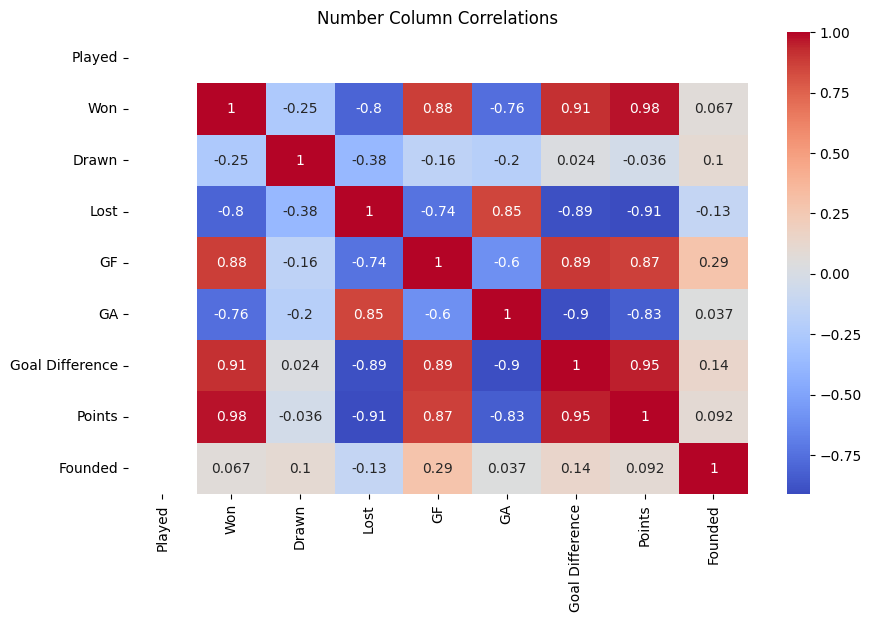

In [156]:
corr_matrix = clean[numeric_cols_manual].corr()
print(corr_matrix)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Number Column Correlations')
plt.show()

In [147]:
clean.head()

,Team_x,Played,Won,Drawn,Lost,GF,GA,Goal Difference,Points,"Form, Last 6 games, Oldest first",Name,Team_y,Founded,Stadium,Country,GoalDifference
0,Arsenal,8,6,1,1,15,3,12,19,LResult LossWResult WinDResult DrawWResult Win...,Arsenal,ARS,1886.0,Emirates Stadium,England,12
1,Manchester City,8,5,1,2,17,6,11,16,LResult LossWResult WinDResult DrawWResult Win...,Unknown,Unknown,1886.0,Unknown,Unknown,11
2,AFC Bournemouth,8,4,3,1,14,11,3,15,WResult WinWResult WinDResult DrawDResult Draw...,Unknown,Unknown,1886.0,Unknown,Unknown,3
3,Liverpool,8,5,0,3,14,11,3,15,WResult WinWResult WinWResult WinLResult LossL...,Liverpool,LIV,1892.0,Anfield,England,3
4,Chelsea,8,4,2,2,16,9,7,14,WResult WinDResult DrawLResult LossLResult Los...,Chelsea,CHE,1905.0,Stamford Bridge,England,7


Teams with high GF are more likely to finish at the top of the table. 
Teams with a large GA are more often at the bottom of the table.

In [148]:
clean['GoalDifference'] = clean['GF'] - clean['GA']
clean[['Team_x', 'Points', 'GoalDifference']]

,Team_x,Points,GoalDifference
0,Arsenal,19,12
1,Manchester City,16,11
2,AFC Bournemouth,15,3
3,Liverpool,15,3
4,Chelsea,14,7
5,Tottenham Hotspur,14,7
6,Sunderland,14,3
7,Crystal Palace,13,4
8,Manchester United,13,-1
9,Brighton & Hove Albion,12,1


Visualization

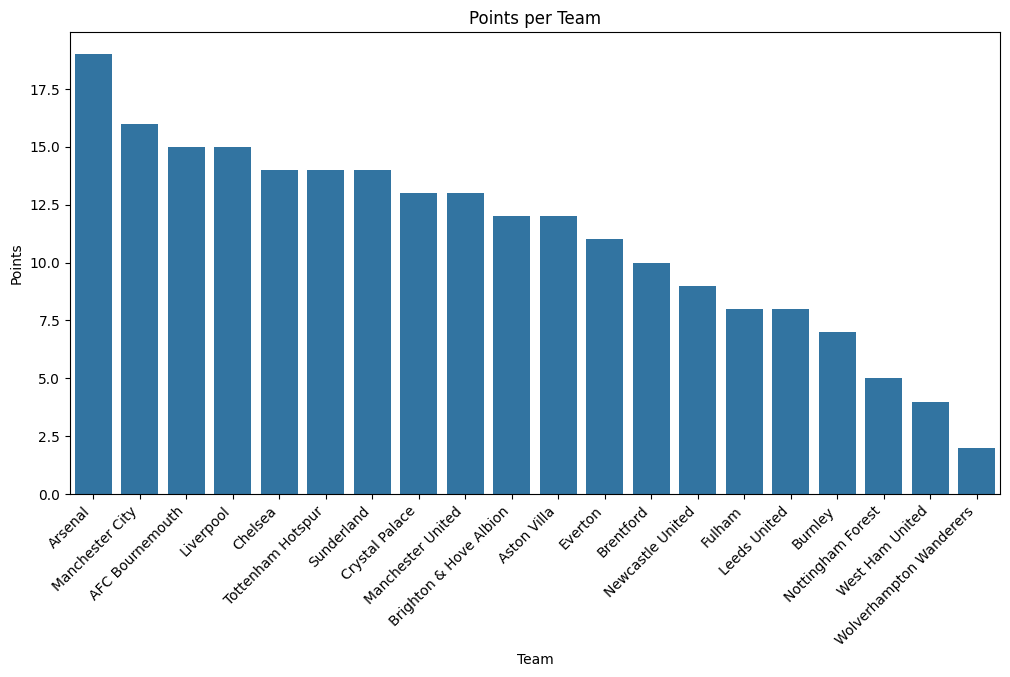

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x='Team_x', y='Points', data=clean.sort_values('Points', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Points per Team')
plt.ylabel('Points')
plt.xlabel('Team')
plt.show()

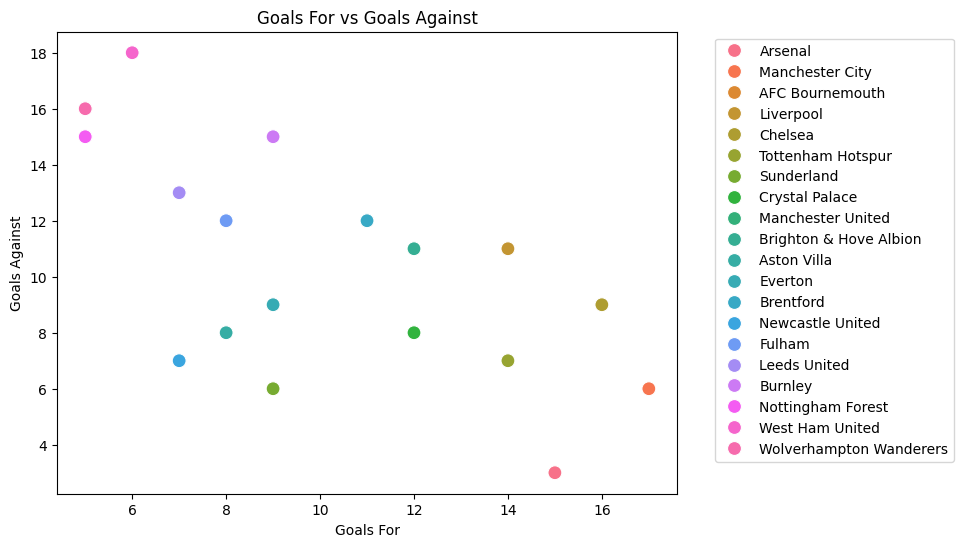

In [137]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GF', y='GA', data=clean, hue='Team_x', s=100)
plt.title('Goals For vs Goals Against')
plt.xlabel('Goals For')
plt.ylabel('Goals Against')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


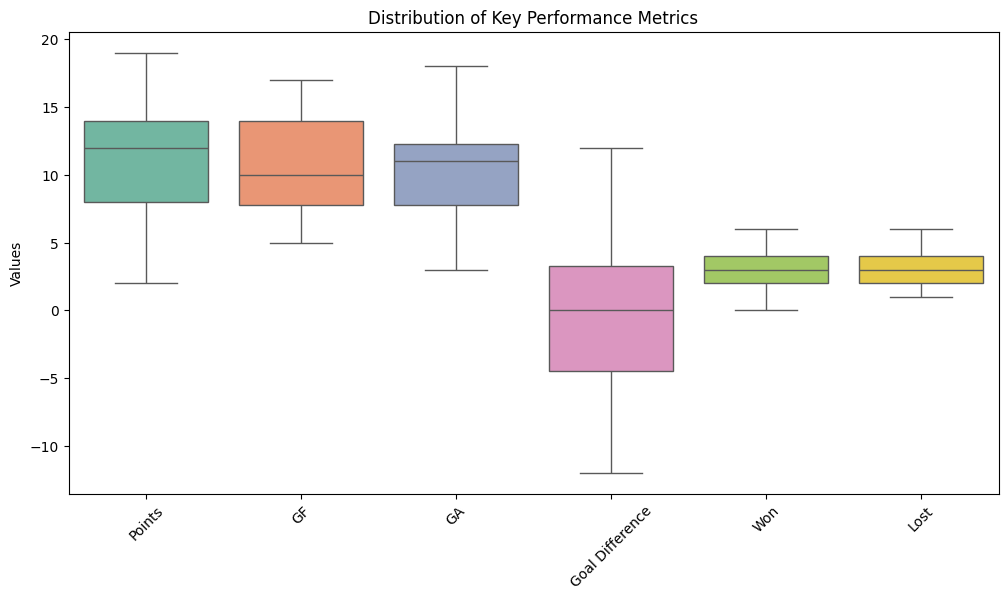

In [140]:
cols_to_plot = ['Points', 'GF', 'GA', 'Goal Difference', 'Won', 'Lost']
plt.figure(figsize=(12,6))
sns.boxplot(data=clean[cols_to_plot], palette='Set2')
plt.title('Distribution of Key Performance Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


No outliers were detected in key columns (Points, GF, GA, Goal Difference, Wins, Losses). The data is clean, and the distributions appear consistent, as confirmed by the boxplots.